In [ ]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt


Using TensorFlow backend


In [ ]:
DATA_DIR = '/kaggle/input/competition/'

for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competition/sample_submission.csv
/kaggle/input/competition/train_prompts.csv
/kaggle/input/competition/test_essays.csv
/kaggle/input/competition/train_essays.csv


In [ ]:
df_train_prompts = pd.read_csv(DATA_DIR + "train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes
None


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
df_train_essays = pd.read_csv(DATA_DIR + "train_essays.csv")
print(df_train_essays.info())
df_train_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


Text(0.5, 1.0, 'Distribution of prompt ID')

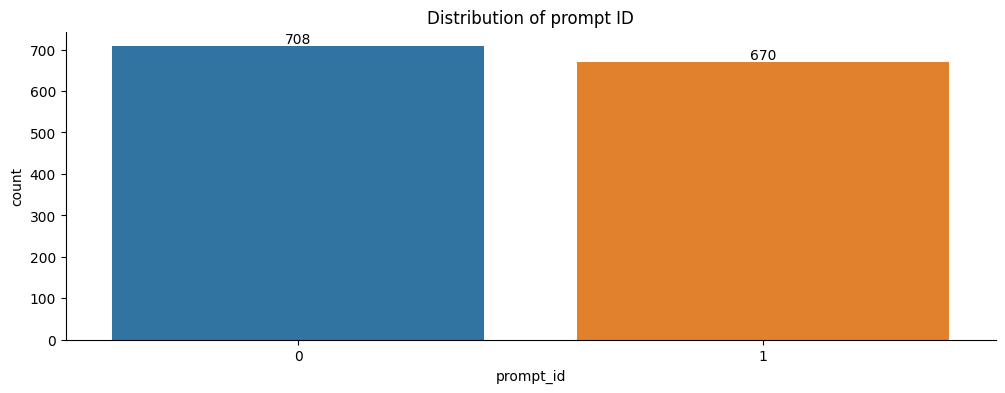

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="prompt_id")

abs_values = df_train_essays['prompt_id'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt ID")

Text(0.5, 1.0, 'Distribution of Generated Text')

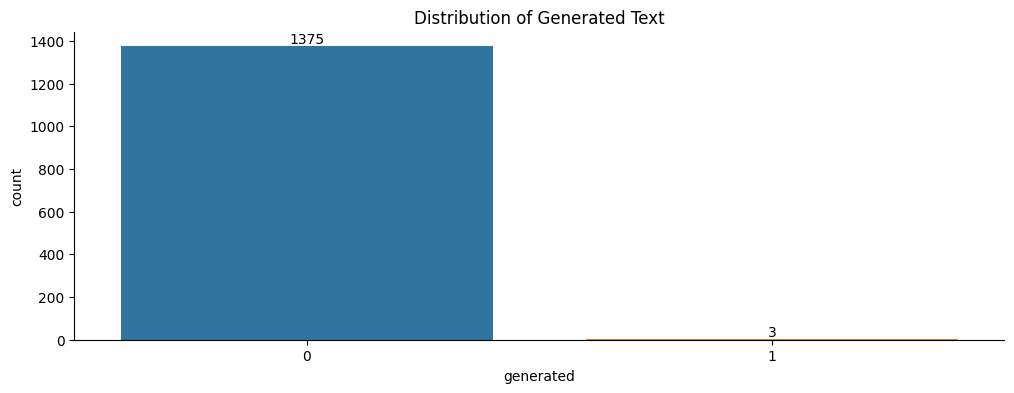

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="generated")

abs_values = df_train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [ ]:
df_test_essays = pd.read_csv(DATA_DIR + "test_essays.csv")
print(df_test_essays.info())
df_test_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None


,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [ ]:
df_test_essays["text"].apply(lambda x : len(x))

0    12
1    12
2    12
Name: text, dtype: int64

In [ ]:
df_train_essays_ext = pd.read_csv('/kaggle/input/competition1/train_v2_drcat_02.csv')

df_train_essays_ext.rename(columns = {"label":"generated"}, inplace=True)

df_train_essays_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
df_train_essays_ext.head()

,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


Text(0.5, 1.0, 'Distribution of Generated Text')

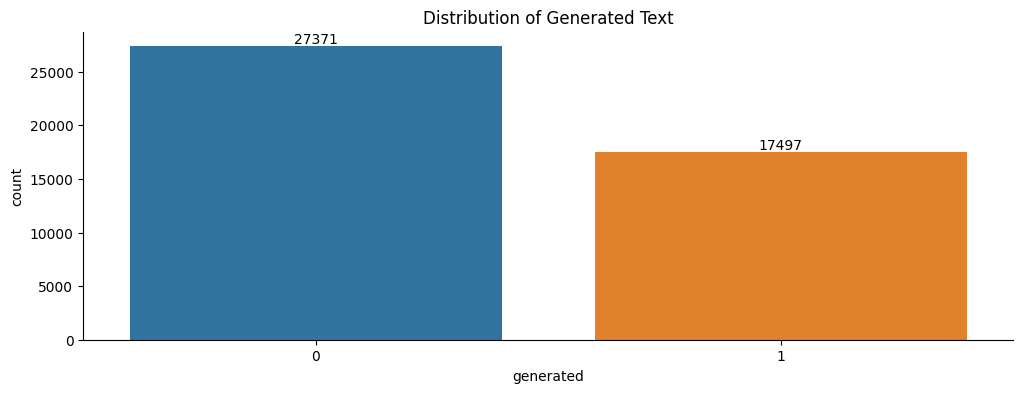

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_ext,
                   x="generated")

abs_values = df_train_essays_ext['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [ ]:
df_train_essays

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [ ]:
df_train_essays_final = pd.concat([df_train_essays_ext[["text", "generated"]], df_train_essays[["text", "generated"]]])

df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46246 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df_train_essays["text_length"] = df_train_essays["text"].apply(lambda x : len(x.split()))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

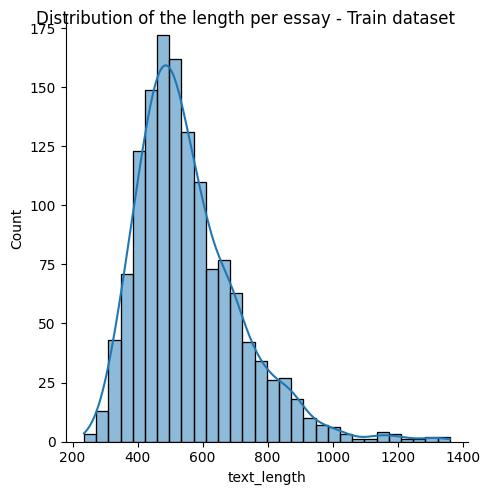

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=df_train_essays,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

In [ ]:
df_train_essays["text_length"].mean() + df_train_essays["text_length"].std()

716.0440978092684

In [ ]:
from keras.layers import Input, Dense, Embedding, Dropout, LayerNormalization
from keras.models import Model
from keras.layers import Layer
import tensorflow as tf

# Paramètres du modèle
vocab_size = 30000  # Taille du vocabulaire
embedding_dim = 128  # Taille des vecteurs d'embedding
max_length = 512  # Longueur maximale des séquences
num_heads = 8  # Nombre de têtes d'attention
ff_dim = 512  # Dimension de la couche feed-forward
num_layers = 6  # Nombre de blocs transformer
num_classes = len(set(df_train_essays_final["generated"]))  # Nombre de classes

# Couche personnalisée pour le pooling global
class GlobalAveragePoolingLayer(Layer):
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=1)

# Fonction de Scaled Dot-Product Attention
def scaled_dot_product_attention(query, key, value, mask=None):
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    dk = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output, attention_weights

# Bloc Multi-Head Attention
class MultiHeadAttention(Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.depth = key_dim // num_heads
        self.wq = Dense(key_dim)
        self.wk = Dense(key_dim)
        self.wv = Dense(key_dim)
        self.dense = Dense(key_dim)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, query, key, value, mask=None):
        batch_size = tf.shape(query)[0]
        query = self.split_heads(self.wq(query), batch_size)
        key = self.split_heads(self.wk(key), batch_size)
        value = self.split_heads(self.wv(value), batch_size)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.key_dim))
        return self.dense(concat_attention)

# Bloc Transformer
def transformer_block(inputs, key_dim, num_heads, ff_dim, dropout_rate=0.1):
    attention_output = MultiHeadAttention(num_heads, key_dim)(inputs, inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention_output)
    ff_output = Dense(ff_dim, activation="relu")(out1)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    return LayerNormalization(epsilon=1e-6)(out1 + ff_output)

# Création du modèle
inputs = Input(shape=(max_length,), dtype=tf.int32)
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(inputs)

# Ajout de blocs Transformer
for _ in range(num_layers):
    x = transformer_block(x, key_dim=embedding_dim, num_heads=num_heads, ff_dim=ff_dim)

# Pooling global
x = GlobalAveragePoolingLayer()(x)  # Utilisation de la couche personnalisée

# Sortie
x = Dropout(0.1)(x)
outputs = Dense(num_classes, activation="softmax")(x)

# Compilation du modèle
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 512, 128)       │      3,840,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_6    │ (None, None, 128)      │         66,048 │ embedding_1[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_1[0][0],     │
│                           │                        │                │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, None, 128)      │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 512, 128)       │              0 │ embedding_1[0][0],     │
│                           │                        │                │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_12    │ (None, 512, 128)       │            256 │ add_12[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 512, 512)       │         66,048 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 512, 128)       │         65,664 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 512, 128)       │              0 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 512, 128)       │              0 │ layer_normalization_1… │
│                           │                        │                │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_13    │ (None, 512, 128)       │            256 │ add_13[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_7    │ (None, None, 128)      │         66,048 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, None, 128)      │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_14 (Add)              │ (None, 512, 128)       │              0 │ layer_normalization_1… │
│                           │                        │                │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1

 Total params: 5,029,890 (19.19 MB)

 Trainable params: 5,029,890 (19.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Création du tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<UNK>")
tokenizer.fit_on_texts(df_train_essays_final["text"])

# Conversion des textes en séquences
X = tokenizer.texts_to_sequences(df_train_essays_final["text"])
X = pad_sequences(X, maxlen=max_length, padding="post", truncating="post")

# Conversion des labels
y = df_train_essays_final["generated"].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=32)


1157/1157 ━━━━━━━━━━━━━━━━━━━━ 10073s 9s/step - accuracy: 0.9442 - loss: 0.1250 - val_accuracy: 0.9896 - val_loss: 0.0352


290/290 ━━━━━━━━━━━━━━━━━━━━ 942s 3s/step
Accuracy: 0.9896
Precision: 0.9898
Recall: 0.9896
F1 Score: 0.9896
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5704
           1       1.00      0.97      0.99      3546

    accuracy                           0.99      9250
   macro avg       0.99      0.99      0.99      9250
weighted avg       0.99      0.99      0.99      9250



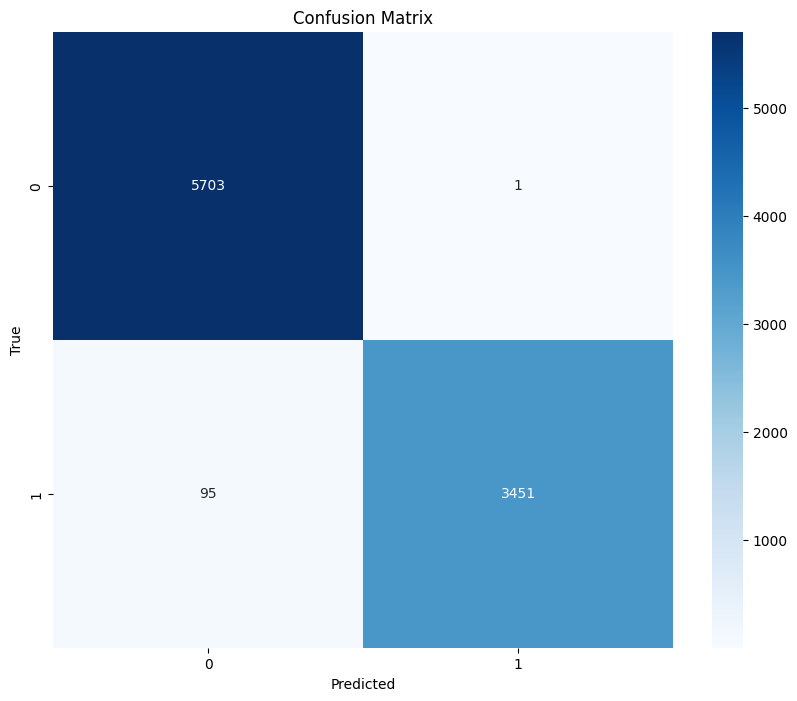

AUC-ROC Score: 0.9994


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prédictions sur le jeu de validation
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcul de l'accuracy
accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calcul de la précision, rappel et F1-score
precision = precision_score(y_val, y_pred_classes, average='weighted')
recall = recall_score(y_val, y_pred_classes, average='weighted')
f1 = f1_score(y_val, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Rapport de classification complet
print("Classification Report:\n")
print(classification_report(y_val, y_pred_classes))

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calcul de l'AUC-ROC pour les modèles multi-classes (utilise une stratégie "ovo" ou "ovr")
y_val_bin = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
roc_auc = roc_auc_score(y_val_bin, y_pred, average="weighted", multi_class="ovr")
print(f"AUC-ROC Score: {roc_auc:.4f}")


In [ ]:
# Exemple de texte à tester (que ce soit un texte humain ou généré par LLM)
test_text = "Cars have been part of our cities and our lives for decades now. They’re comfortable, they can take us almost everywhere, they suit our lifestyle, and they are advertised to become more and more sustainable.  So, what’s all the car-free fuzz about? Doesn’t an additional lane or more parking spaces solve anything? What’s the case for car-free cities? And how is a city’s liveability inherently connected to challenging the status of passenger cars?"

# Prétraitement du texte
test_sequence = tokenizer.texts_to_sequences([test_text])  # Convertir le texte en séquence
test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding="post", truncating="post")  # Appliquer le padding

# Prédiction
y_pred_test = model.predict(test_sequence)
y_pred_class = np.argmax(y_pred_test, axis=1)  # Classe prédite

# Afficher le résultat
if y_pred_class == 0:
    print("Texte écrit par un humain.")
else:
    print("Texte généré par un LLM.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Texte écrit par un humain.


In [ ]:
#genere par llm
#Car-Free Cities is a concept aiming to reduce urban traffic congestion, pollution, and reliance on private cars by creating car-free zones in cities. This initiative promotes the use of sustainable modes of transport such as walking, cycling, and public transit. By implementing smart urban planning and efficient public transport systems, car-free cities enhance the quality of life, reduce environmental impact, and foster healthier lifestyles for residents. Additionally, these cities often integrate green spaces and pedestrian-friendly infrastructure, making them more livable and environmentally sustainable. The transition to car-free urban areas is a step towards a greener, more sustainable future for cities worldwide.